# Import Liabraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [5]:
train_df = pd.read_csv("au_train.csv")
test_df = pd.read_csv("au_test.csv")

# Data Preprocessing (Clean Class Column)

In [6]:
train_df["class"] = train_df["class"].str.strip().str.replace(".", "", regex=False)
test_df["class"] = test_df["class"].str.strip().str.replace(".", "", regex=False)

# Combine for Preprocessing

In [7]:
full_df = pd.concat([train_df, test_df], axis=0)
full_df.replace("?", np.nan, inplace=True)

# Fill Missing Values

In [8]:
for col in full_df.select_dtypes(include="object").columns:
    full_df[col].fillna(full_df[col].mode()[0], inplace=True)

<ipython-input-8-1c724f128c00>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df[col].fillna(full_df[col].mode()[0], inplace=True)


# Encode Categorical Features

In [9]:
label_encoders = {}
for col in full_df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    full_df[col] = le.fit_transform(full_df[col])
    label_encoders[col] = le

# Split Back

In [10]:
train_cleaned = full_df.iloc[:len(train_df)]
test_cleaned = full_df.iloc[len(train_df):]

# Features and Targets

In [11]:
X_train = train_cleaned.drop("class", axis=1)
y_train = train_cleaned["class"]
X_test = test_cleaned.drop("class", axis=1)
y_test = test_cleaned["class"]

# Train Logistic Regression

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# Predict

In [13]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate

In [14]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy

In [15]:
print("Accuracy:", accuracy)

Accuracy: 0.8060929918309686


# F1 Score

In [16]:
print("F1 Score:", f1)

F1 Score: 0.46446140797285834


# ROC Area Under Curve

In [17]:
print("ROC AUC:", roc_auc)

ROC AUC: 0.8151609273056085


# Confusion Matrix

In [18]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[11755   680]
 [ 2477  1369]]


# Plot ROC Curve

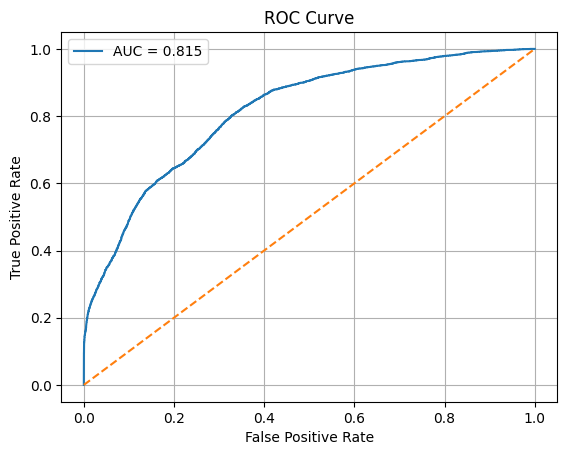

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()